In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [4]:
df = pd.read_csv('/content/admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isnull().values.any()

False

In [8]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [9]:
(df==0).sum()

SerialNo.             0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research            220
ChanceofAdmit         0
dtype: int64

In [13]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[74 13]
 [ 6 32]]


In [17]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.848
2. Precision Score: 0.7111111111111111
3. Recall Score: 0.8421052631578947
4. f1 Score: 0.7710843373493975


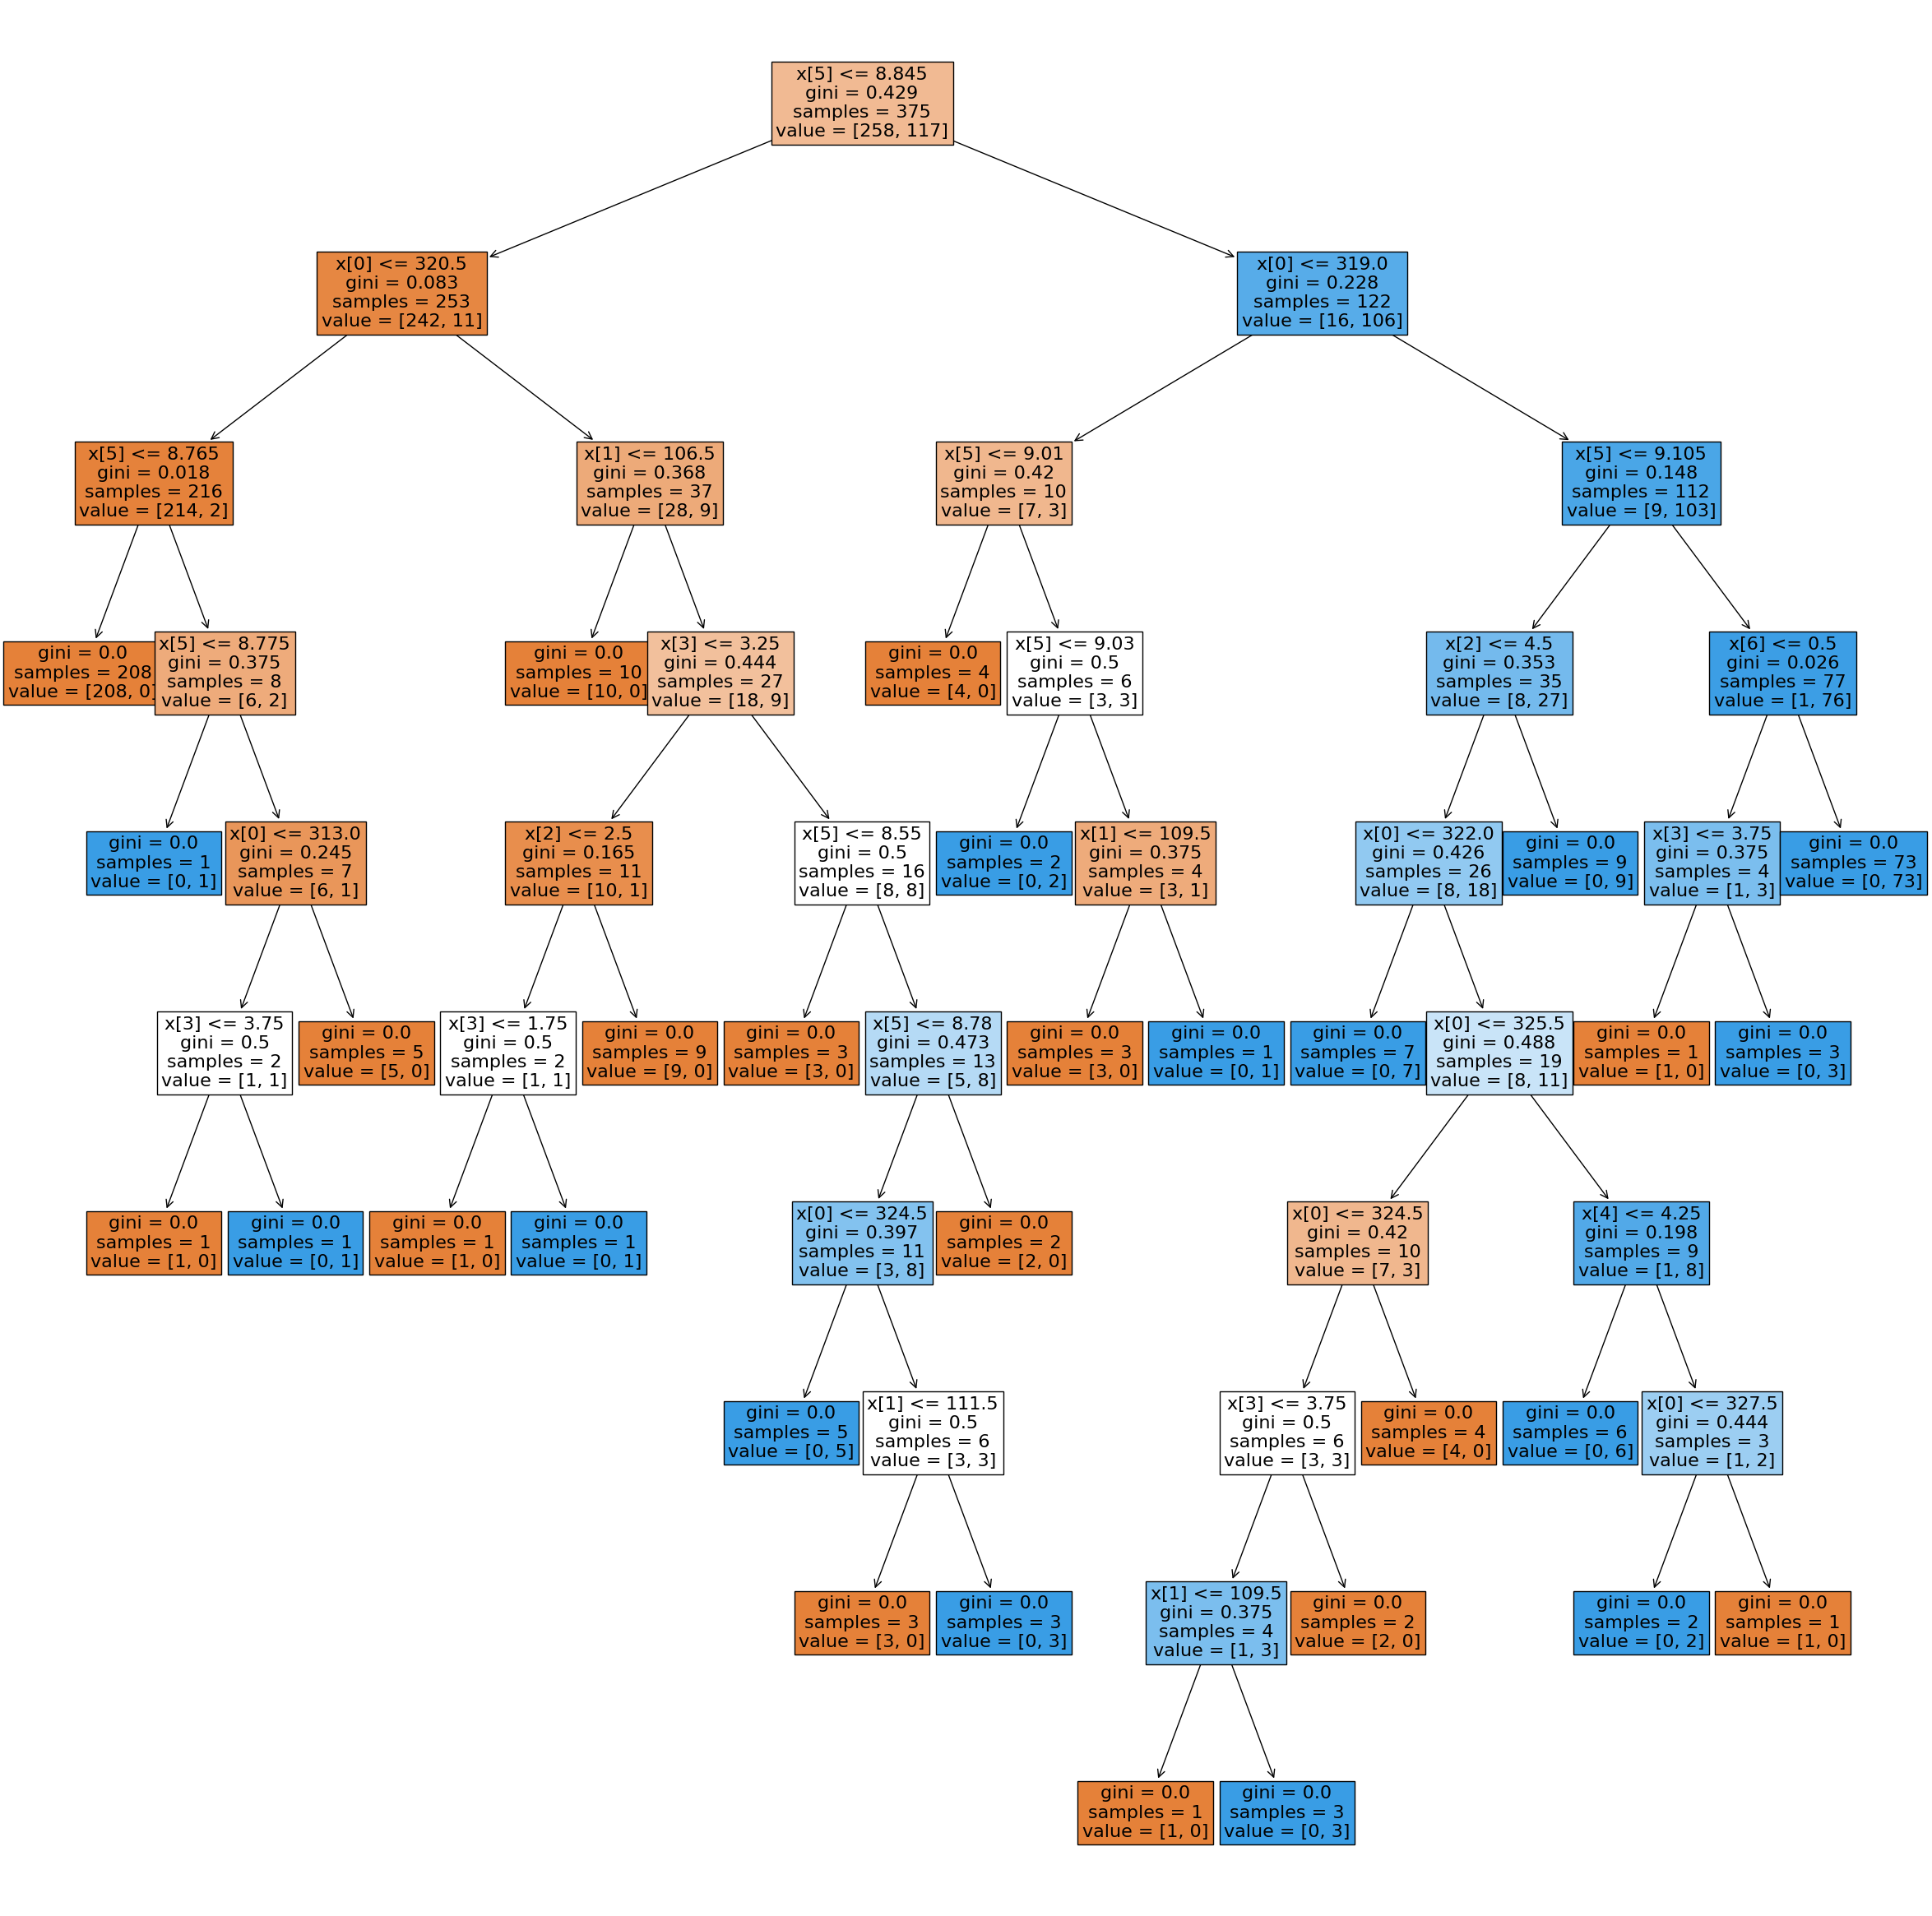

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()